# Autoregressive Model 

## Import Necessary Packages

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## Simulate AR(2) Process 

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [2]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [3]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

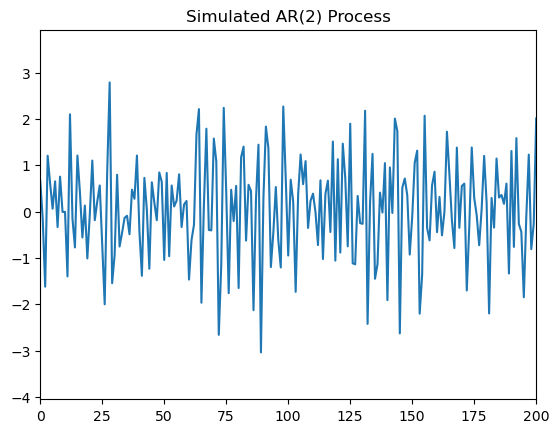

In [4]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

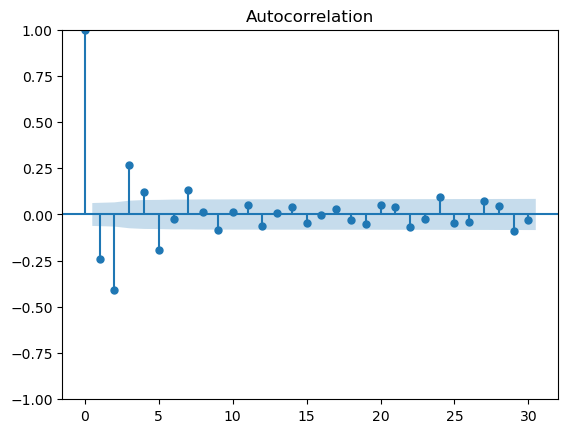

In [5]:
plot_acf(AR2_process);

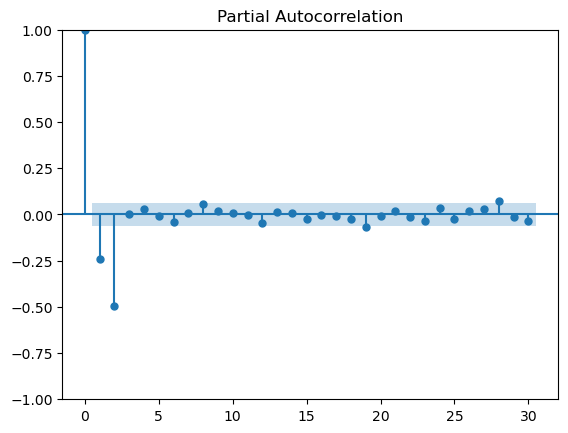

In [6]:
plot_pacf(AR2_process);

In [7]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.3607328  0.49445692]
sigma: 0.9761386004376333


## Simulate AR(3) Process 

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3} $

In [8]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [9]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

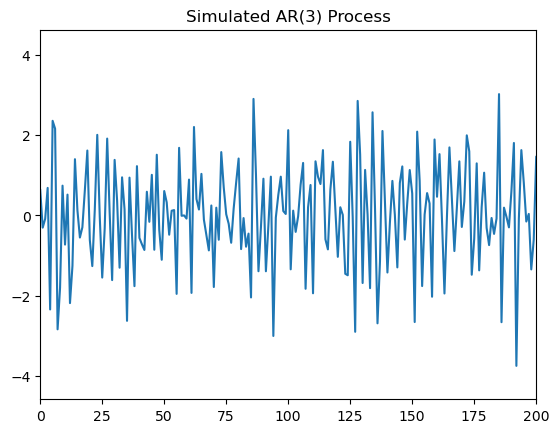

In [10]:
plt.plot(AR3_process)
plt.title('Simulated AR(3) Process')
plt.xlim(0, 200)
plt.show()

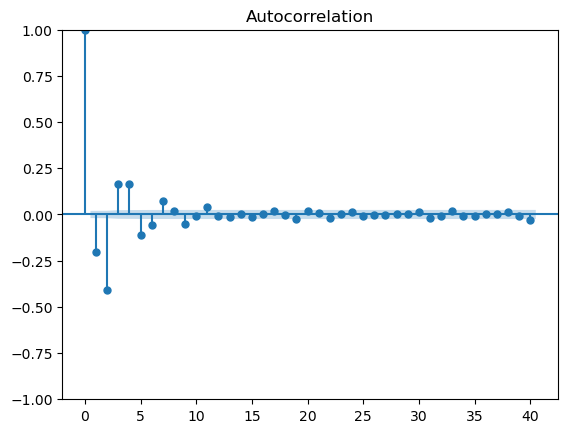

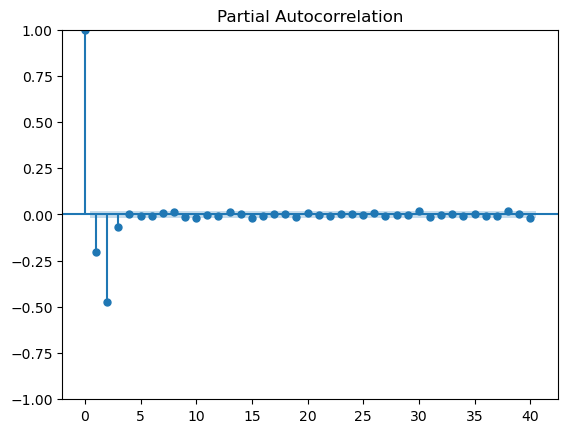

In [11]:
plot_acf(AR3_process);
plot_pacf(AR3_process);

In [12]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.32879803 0.49105708 0.06772595]
sigma: 0.9902740509369389


#  Model Johnson&Johnson Quarterly Earnings per Share (EPS) 

In [13]:
data = pd.read_csv(r'datasets/jj_dataset.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


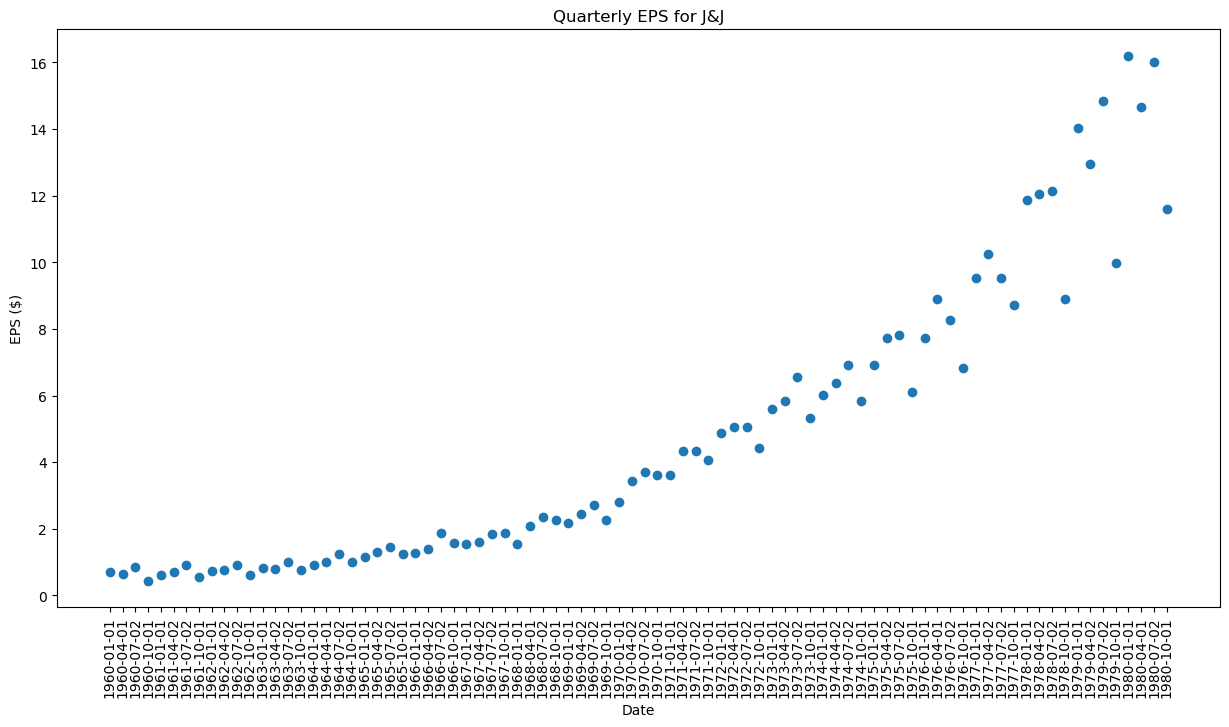

In [14]:
plt.figure(figsize=[15, 7.5])
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['data'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: 2.742016573457468
p-value: 1.0
Critial Values: {'1%': -3.524624466842421, '5%': -2.9026070739026064, '10%': -2.5886785262345677}
Series is not Stationary


##  Take the log difference

In [16]:
# Take the log difference

data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


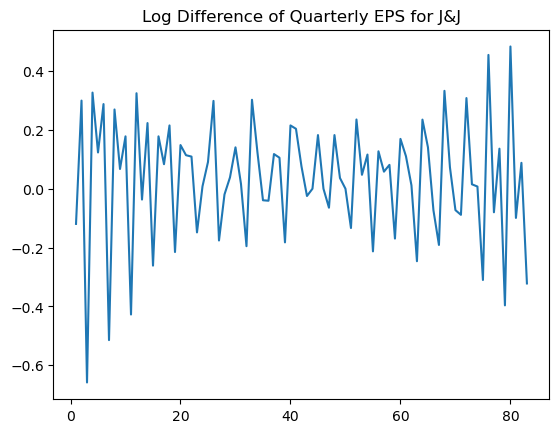

In [17]:
plt.plot(data['data'])
plt.title('Log Difference of Quarterly EPS for J&J')
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['data'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: -4.317043945811842
p-value: 0.00041497314044405755
Critial Values: {'1%': -3.518281134660583, '5%': -2.899878185191432, '10%': -2.5872229937594873}
Series is Stationary


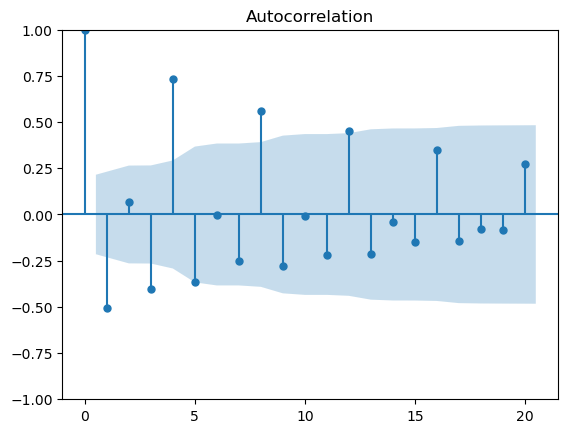

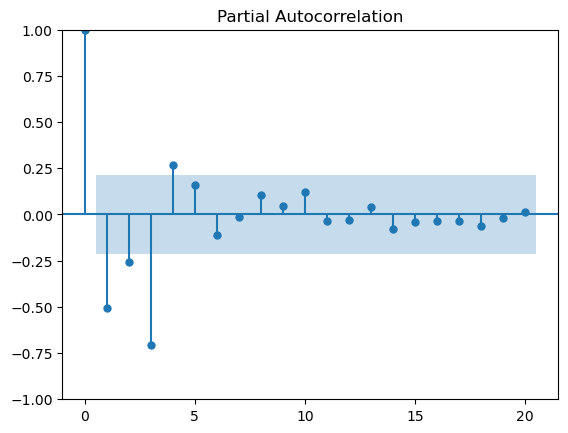

In [19]:
plot_acf(data['data']);
plot_pacf(data['data']);

In [20]:
# Try AR(4)

rho, sigma = yule_walker(data['data'], 4,method='mle')

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.62934923  0.51715263  0.48833738 -0.26512667]
sigma: 0.1191319559071562
